**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from nltk import ngrams
from nltk.corpus import stopwords

**Reading Data**

In [2]:
data = pd.read_csv('alldata.csv')

In [3]:
data.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


**Cleaning Data**

In [4]:
import string
def punc(text):
    try:
        text = [c for c in text if c not in string.punctuation]#removes punctuation
    except:
        text = [' ']
    return ''.join(text)
def first(text):
    try:
        text = text.split(',')#removes ',' and return first word
        return text[0]
    except:
        pass
    return ''
#getting location 
data.location = data.location.apply(first)
#removing punctuation from position ,description ,company columns
data.position = data.position.apply(punc)
data.description = data.description.apply(punc)
data.company = data.company.apply(punc)

**converting all words to lowercase in description,position,and company columns and removing job description word from description column**

In [5]:
data.description = [i.lower() for i in data.description]
data.position = [i.lower() for i in data.position]
data.company = [i.lower() for i in data.company]
data.description.replace(to_replace = 'job description',value = "",regex = True)
data.head()

,position,company,description,reviews,location
0,development director,als tdi,development director\nals therapy development ...,NaN,Atlanta
1,an ostentatiouslyexcitable principal research ...,the hexagon lavish,job description\n\nthe road that leads to acco...,NaN,Atlanta
2,data scientist,xpert staffing,growing company located in the atlanta ga area...,NaN,Atlanta
3,data analyst,operation hope,department program operationsposition location...,44.0,Atlanta
4,assistant professor tt signal processing mac...,emory university,description\nthe emory university department o...,550.0,Atlanta


**Finding companies which have maximum no of vacencies** 

In [6]:
vacancies = data.company.value_counts().rename_axis('values').reset_index(name='counts')

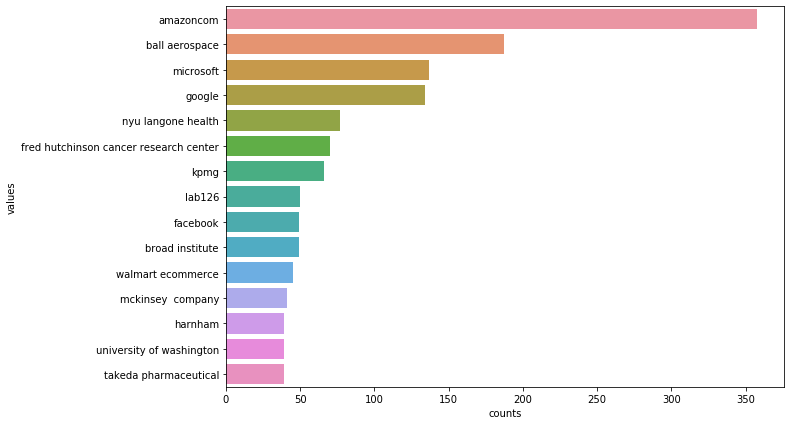

In [7]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'counts',y = 'values',data = vacancies[:15])

**Finding positions which has maximum no of vacancies**

In [8]:
positions = data.position.value_counts().rename_axis('values').reset_index(name = 'counts')

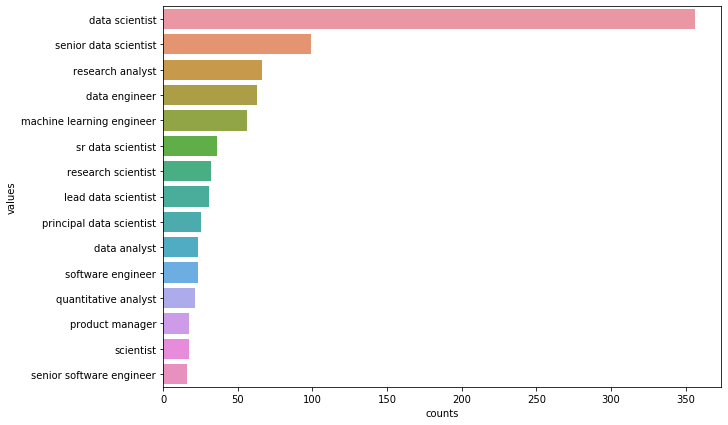

In [9]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'counts',y = 'values',data = positions[:15])

**Finding locations which has maximum number of vacancies**

In [10]:
locations = data.location.value_counts().rename_axis('values').reset_index(name = 'counts')

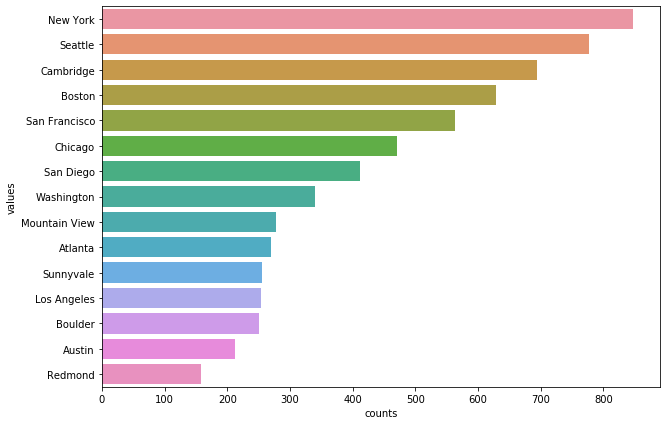

In [11]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'counts',y = 'values',data = locations[:15])

**Renaming position column into five categories for our convenient handling**

In [12]:
def change(text):
    if 'data scientist' in text:
        return 'data scientist'
    elif 'analyst' in text:
        return 'data analyst'
    elif 'consultant' in text or 'manager' in text:
        return 'data science manager'
    elif 'machine learning' in text or 'statistical programmer' in text:
        return 'machine learning engineer'
    else:
        return 'other'

In [13]:
data.position = data.position.apply(change)

**After renaming position column looks like this**

In [14]:
data.head()

,position,company,description,reviews,location
0,other,als tdi,development director\nals therapy development ...,NaN,Atlanta
1,other,the hexagon lavish,job description\n\nthe road that leads to acco...,NaN,Atlanta
2,data scientist,xpert staffing,growing company located in the atlanta ga area...,NaN,Atlanta
3,data analyst,operation hope,department program operationsposition location...,44.0,Atlanta
4,machine learning engineer,emory university,description\nthe emory university department o...,550.0,Atlanta


**droping review column**

In [15]:
data.drop('reviews',axis = 1,inplace = True)

In [16]:
data.head()

,position,company,description,location
0,other,als tdi,development director\nals therapy development ...,Atlanta
1,other,the hexagon lavish,job description\n\nthe road that leads to acco...,Atlanta
2,data scientist,xpert staffing,growing company located in the atlanta ga area...,Atlanta
3,data analyst,operation hope,department program operationsposition location...,Atlanta
4,machine learning engineer,emory university,description\nthe emory university department o...,Atlanta


**creating ngrams and removing stop words as per requirement**

In [17]:
def grams(pos,n):
    des = data[data.position == pos].description #taking description
    most_frequent = []
    words = []
    for i in des:
        i = nostop(i)
        most_frequent += ngrams(i.split(),n) #creating ngrams
    words = pd.DataFrame(most_frequent)
    words['gram_' + str(n)] = words[0]
    for i in range(1,n):
        words['gram_' + str(n)] += ' ' + words[i] #creating single column with with all values of tuple
    return words['gram_' + str(n)]
def nostop(text):
    stop = set(stopwords.words('english'))
    filtered = [w for w in text.split() if w not in stop] #removing stop words
    return ' '.join(filtered)

**Extracting ngrams from data scientist description and plot them to see most repeated ngrams**

In [18]:
da1 = grams('data scientist',1) #1gram
da2 = grams('data scientist',2) #2grams
da3 = grams('data scientist',3) #3grams
da1 = da1.value_counts().rename_axis('values').reset_index(name='counts')[:15]#converting into dataframe
da2 = da2.value_counts().rename_axis('values').reset_index(name='counts')[:15]
da3 = da3.value_counts().rename_axis('values').reset_index(name='counts')[:15]

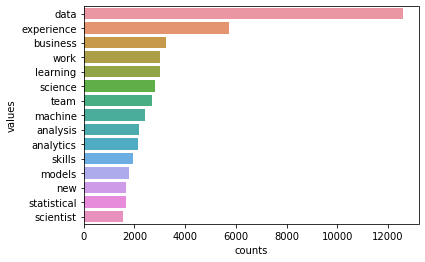

In [19]:
sns.barplot(x = 'counts',y = 'values',data = da1)

**We cannot understand much from single repeated but words but from words like models,analytics,experience we can roughly assume that data scientist should be able to create models for analysis,should be able to perform analysis,and he should have experience.**

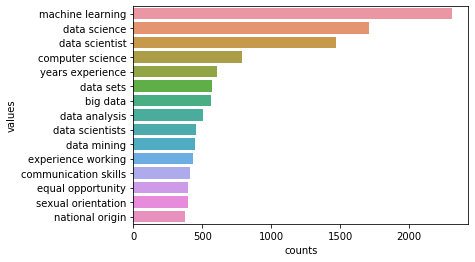

In [20]:
sns.barplot(x = 'counts',y = 'values',data = da2)

**Here we can understand more clearly than single repeated words.From the columns Machine learning,data mining ,data sets,computer science we can understand that he should know machine learning,dataming, he should be able to handle data sets and should have a computer science degree.**

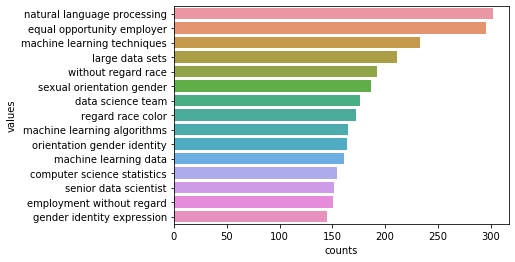

In [21]:
sns.barplot(x = 'counts',y = 'values',data = da3)

**He should know natural language processing,machine learning techniques.He should be able to handle large data sets.He should be able to participate in team.**

**Analysis on data analyst skills**

In [22]:
da1 = grams('data analyst',1)
da2 = grams('data analyst',2)
da3 = grams('data analyst',3)
da1 = da1.value_counts().rename_axis('values').reset_index(name='counts')[:15]
da2 = da2.value_counts().rename_axis('values').reset_index(name='counts')[:15]
da3 = da3.value_counts().rename_axis('values').reset_index(name='counts')[:15]

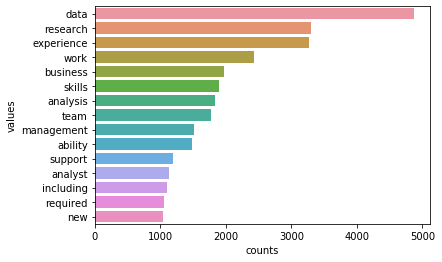

In [23]:
sns.barplot(x = 'counts',y = 'values',data = da1)

**He should be able to handle data,perform analysis,participate in team and etc.**

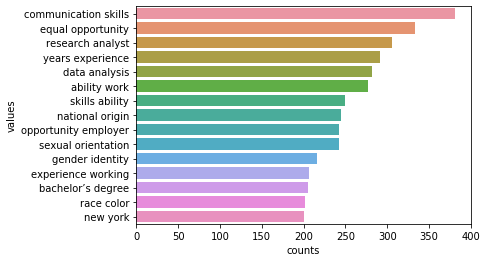

In [24]:
sns.barplot(x = 'counts',y = 'values',data = da2)

**He should have good communication skills and data analysing skills.He should have bachelor's degree.**

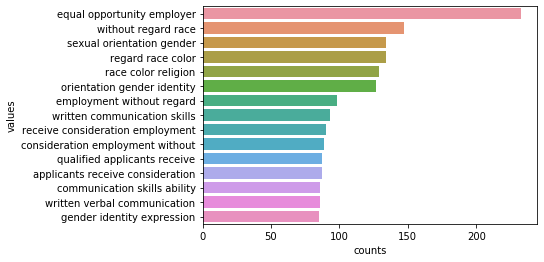

In [25]:
sns.barplot(x = 'counts',y = 'values',data = da3)

**He should have written communication skills,should be equal oppurtunity employer**

**Analysis on Machine learning engineer skills**

In [26]:
da1 = grams('machine learning engineer',1)
da2 = grams('machine learning engineer',2)
da3 = grams('machine learning engineer',3)
da1 = da1.value_counts().rename_axis('values').reset_index(name='counts')[:15]
da2 = da2.value_counts().rename_axis('values').reset_index(name='counts')[:15]
da3 = da3.value_counts().rename_axis('values').reset_index(name='counts')[:15]

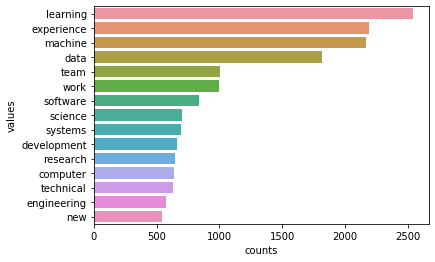

In [27]:
sns.barplot(x = 'counts',y = 'values',data = da1)

**Not able to grasp much info from here,but from data we can assume that he should be able to handle data**

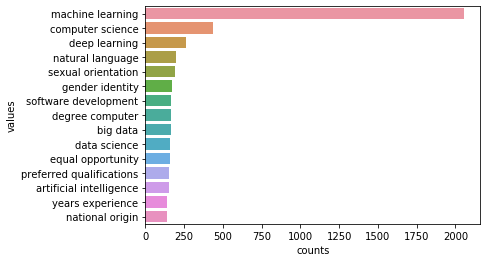

In [28]:
sns.barplot(x = 'counts',y = 'values',data = da2)

**We can see many skills here like machine learning,computer science background,deep learning,natural languge processing,software development,AI,experience.**

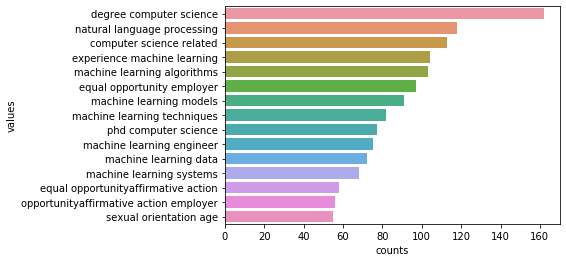

In [29]:
sns.barplot(x = 'counts',y = 'values',data = da3)

**We can see that he should know machine learning techniques,algorithms,phd computer science,experience in machine learning,computer science degree,etc.**

**That's it for now but we can explore more.**